In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('input/train.csv')
print('shape',df.shape)
df.head()

shape (300000, 16)


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


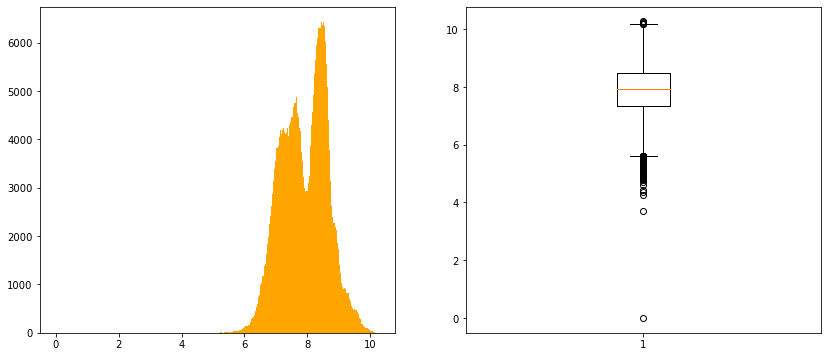

In [14]:
f,ax = plt.subplots(1,2,figsize=(14,6),)

ax[0].hist(df['target'],bins=300,color='orange')
ax[1].boxplot(df['target']);

In [10]:
cols = df.columns[df.columns.str.startswith('cont')].values

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(y)
y = gmm.predict(y)

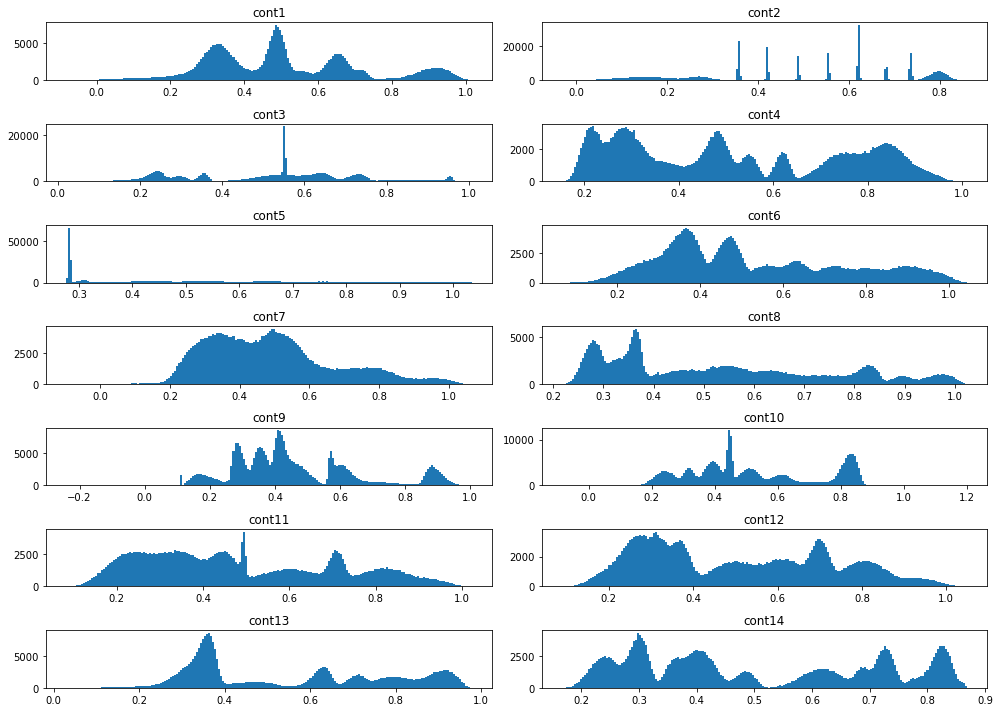

In [11]:
f,ax = plt.subplots(nrows=7,ncols=2,figsize=(14,10))
for i,col in enumerate(cols):
    ax[int(i/2),i%2].set_title(col)
    ax[int(i/2),i%2].hist(df[col],bins=200);

plt.tight_layout()

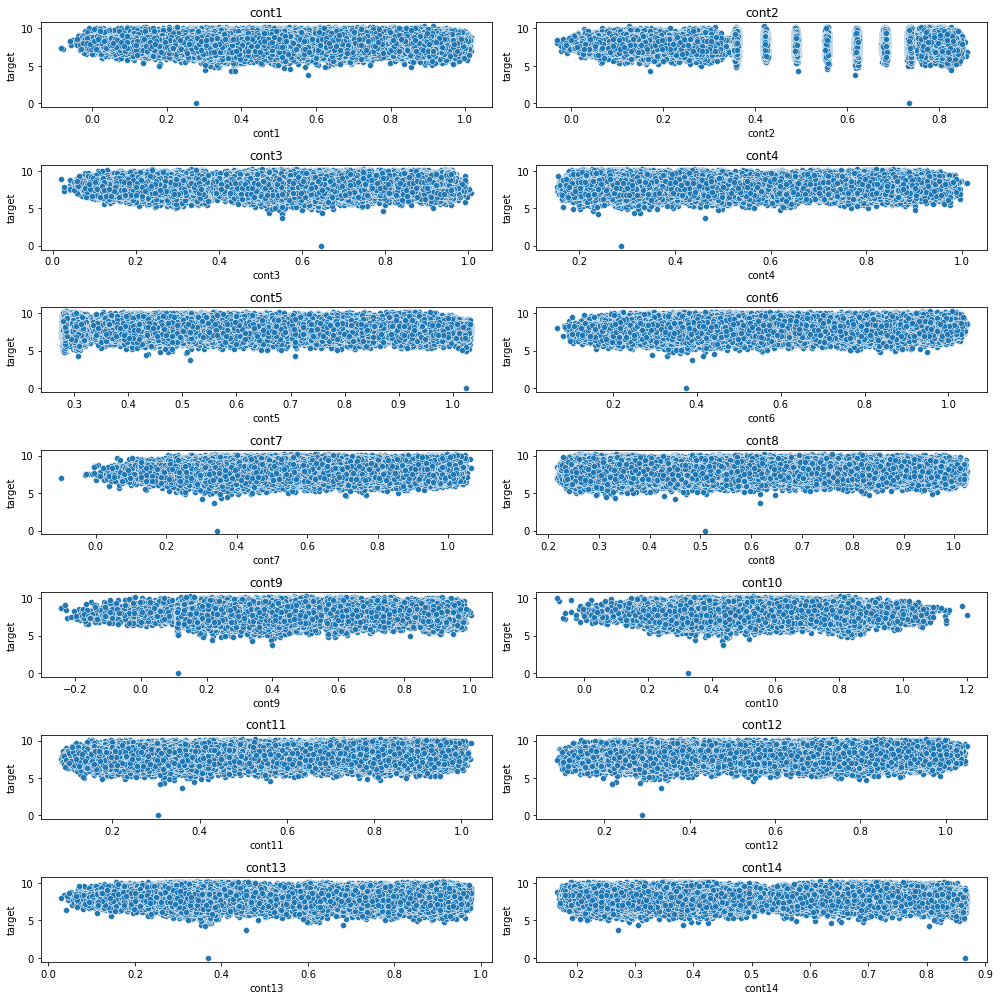

In [50]:

f,ax = plt.subplots(nrows=7,ncols=2,figsize=(14,14))
for i,col in enumerate(cols):
    a = ax[int(i/2),i%2]
    a.set_title(col)
    sns.scatterplot(x=df[col],y=df['target'],sizes=df['target'],ax=a)

plt.tight_layout()

In [52]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [56]:
X = df.drop(['id','target'],axis=1)
y = df['target']

In [74]:
rf = RandomForestRegressor( n_estimators=5,
    criterion='mse',
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=30,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    min_impurity_split=None,
    n_jobs =-1             
    )

In [75]:
rf.fit(X,y)

RandomForestRegressor(max_depth=6, min_samples_leaf=30, min_samples_split=30,
                      n_estimators=5, n_jobs=-1)

In [76]:
pred = rf.predict(X)
metrics.mean_squared_error(y,pred)**0.5

0.7177776266104882

In [77]:
# submission
test = pd.read_csv('input/test.csv')
print('shape',test.shape)
sub = test[['id']]
pred = rf.predict(test.drop('id',axis=1))
sub['target'] = pred

shape (200000, 15)


<ipython-input-77-0f34cc48b89d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['target'] = pred


In [69]:
sub.to_csv('sub.csv',index=False)